## Practical Machine Learning
### Assignment 1: Exploring and Visualizing Data

Description:
This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Background Materials
The MSPA Software Survey was collected in December 2016. Data from the survey were used to inform data science curriculum planning. These data are provided in the comma-delimited text file <mspa-survey-data.csv>.

The survey was conducted online using Survey Monkey. A printed form of the survey items is provided in the file <mspa_software_survey.pdf>.

The survey data file, a jump-start Python program (mspa-software-case-jump-startv001.py), sample visualizations, and code for a heat map function, along with a directory of examples from the R software environment, are included in the zip archive:

mspa-software-survey-case-python-v005.zip

Variable Transformations and Scaling. To understand transformations or scaling methods, follow the Scikit Learn code provided here "https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py"

Some methods (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale.

It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.

Management Questions
Imagine that you are an academic administrator responsible for defining the future direction of the graduate program. The MSPA Survey has been designed with these objectives in mind:
- Learn about current student software preferences.
- Learn about student interest in potential new courses.
- Guide software and systems planning for current and future courses.
- Guide data science curriculum planning.
- Python Programming
- Add to the Python jump-start code example by computing descriptive statistics, exploring, and visualizing the survey data.

When completing this assignment, you are expected to use various Python packages, including NumPy, matplotlib, pandas, and seaborn.

Grading Guidelines (50 points)
------------------------------
- Data preparation, exploration, visualization (10 points)
- Review research design and modeling methods (10 points)
- Review results, evaluate models (10 points)
- Implementation and programming (10 points)
- Exposition, problem description, and management recommendations (10 points)

Deliverables and File Formats
Upload this python notebook once all the sections are complete.

Refer to Google’s Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python code. (https://google.github.io/styleguide/pyguide.html) Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.


In [1]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

##### Setup Environment
- Load Packages
- Setup for seaborn package
- Setup parameters for plots
- Import data into environment

In [3]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [4]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [5]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()

np.set_printoptions(precision=3)

In [6]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()

# avoid empty plot, always good to close plot
plt.close()

In [7]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# Print the first few rows from the file
valid_survey_input.head()

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
2,5132253300,20,0,40,40,0,0,0,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
3,5132096630,10,10,25,35,20,10,10,25,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
4,5131990362,20,0,0,70,10,20,0,0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [8]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [9]:
list(set(valid_survey_input.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [10]:
df_num = valid_survey_input.select_dtypes(include = ['float64', 'int64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5135740122 to 5109806898
Data columns (total 20 columns):
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS                        207 non-null int64
Python_Course_Interest              206 non-null float

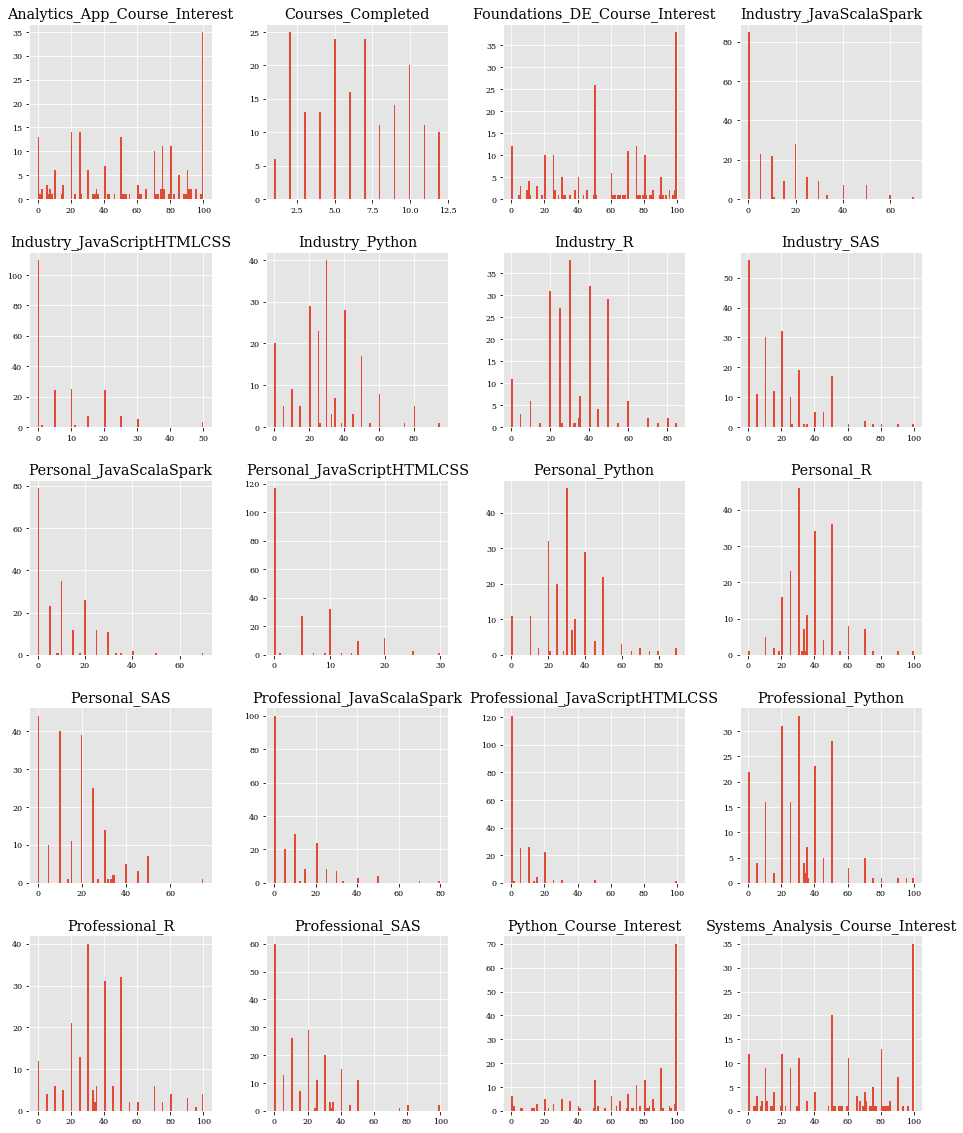

In [11]:
df_num.hist(figsize=(16, 20), bins=100,xlabelsize=8, ylabelsize=8); 

In [12]:
df_num_corr = df_num.corr()['Personal_R']
r_id = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with Personal R:\n{}".format(len(r_id), r_id))

There is 17 strongly correlated values with Personal R:
Personal_R                          1.000000
Professional_R                      0.763444
Industry_R                          0.667045
Professional_SAS                   -0.152498
Personal_SAS                       -0.155090
Analytics_App_Course_Interest      -0.176444
Systems_Analysis_Course_Interest   -0.214047
Professional_JavaScalaSpark        -0.247095
Industry_JavaScalaSpark            -0.247213
Python_Course_Interest             -0.254034
Industry_Python                    -0.263190
Professional_JavaScriptHTMLCSS     -0.296240
Industry_JavaScriptHTMLCSS         -0.306092
Personal_JavaScriptHTMLCSS         -0.321997
Professional_Python                -0.344084
Personal_Python                    -0.374659
Personal_JavaScalaSpark            -0.391172
Name: Personal_R, dtype: float64


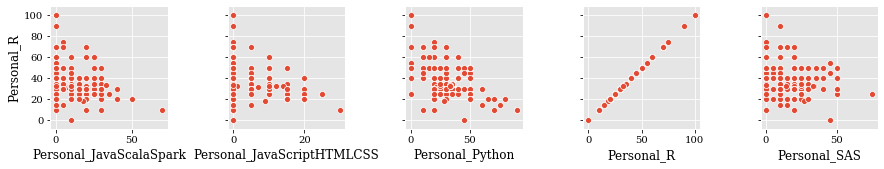

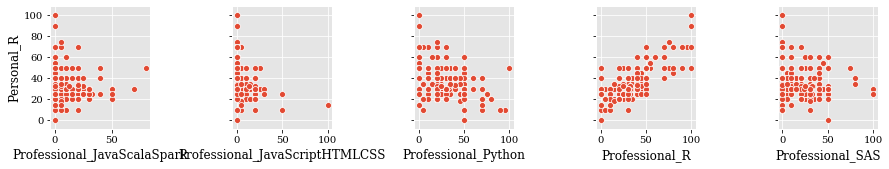

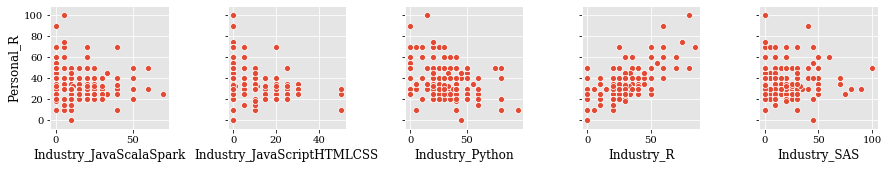

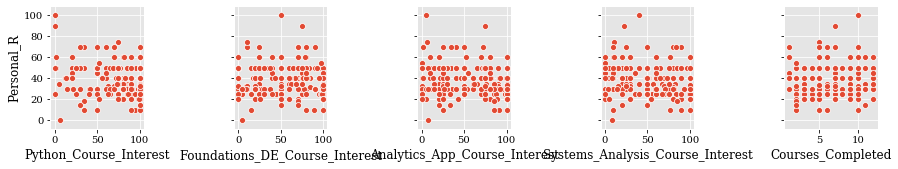

In [13]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Personal_R'])

In [14]:
valid_survey_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5135740122 to 5109806898
Data columns (total 40 columns):
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS                        207 non-null int64
Python_Course_Interest              206 non-null float

In [15]:
### examine the structure of the DataFrame object###
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input), '\n') 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
valid_survey_input.columns

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input))


Contents of initial survey data ---------------

Number of Respondents = 207 

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professi

In [16]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [17]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

In [18]:
software_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 5135740122 to 5109806898
Data columns (total 15 columns):
My_Java        207 non-null int64
My_JS          207 non-null int64
My_Python      207 non-null int64
My_R           207 non-null int64
My_SAS         207 non-null int64
Prof_Java      207 non-null int64
Prof_JS        207 non-null int64
Prof_Python    207 non-null int64
Prof_R         207 non-null int64
Prof_SAS       207 non-null int64
Ind_Java       207 non-null int64
Ind_JS         207 non-null int64
Ind_Python     207 non-null int64
Ind_R          207 non-null int64
Ind_SAS        207 non-null int64
dtypes: int64(15)
memory usage: 25.9+ KB


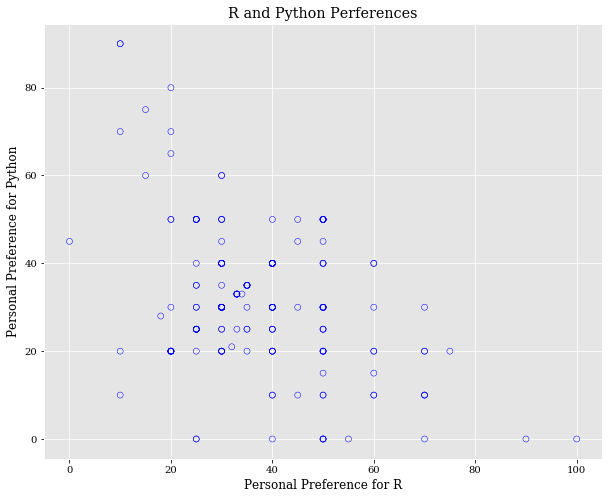

In [19]:

fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
x=survey_df['My_R']
y=survey_df['My_Python']

scatter_plot = axis.scatter(x=survey_df['My_R'], 
                            y=survey_df['My_Python'],
                            facecolors = 'none', 
                            edgecolors = 'blue') 


plt.show()

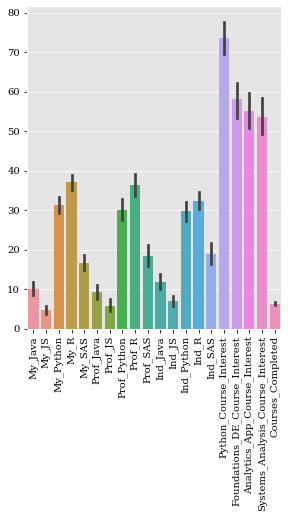

In [20]:

x=survey_df['My_R']
y=survey_df['My_Python']

#plt.figure(figsize = (14, 14))
sns.catplot(kind="bar", data=survey_df)
plt.xticks(rotation=90)
plt.show()

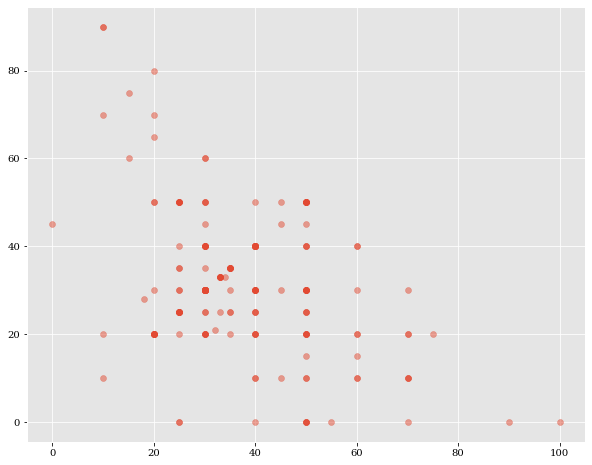

In [21]:
N = 207
colors = np.random.rand(N)
plt.scatter(x, y, cmap = colors, alpha=0.5)
plt.show()

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

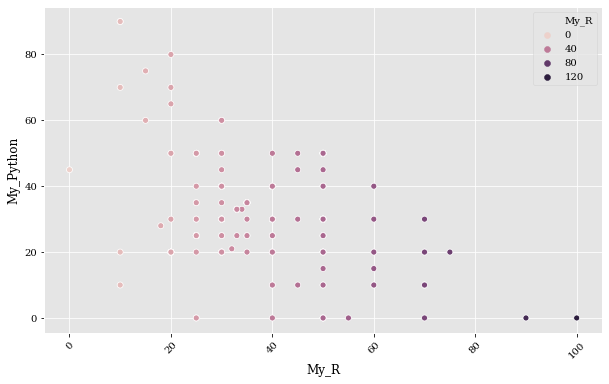

In [22]:
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x='My_R', y='My_Python', data=software_df, hue = 'My_R')
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

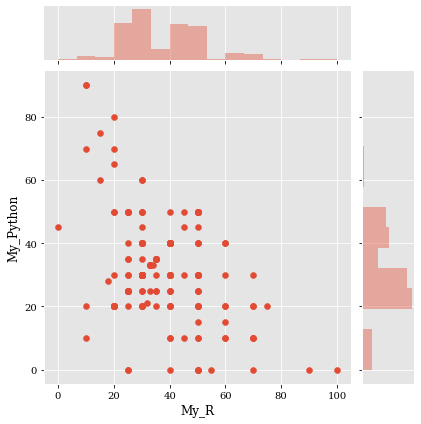

In [23]:
sns.jointplot(x, y, data=software_df);

In [24]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
] 

In [25]:
survey_df_labels

['Personal Preference for Java/Scala/Spark',
 'Personal Preference for Java/Script/HTML/CSS',
 'Personal Preference for Python',
 'Personal Preference for R',
 'Personal Preference for SAS',
 'Professional Java/Scala/Spark',
 'Professional JavaScript/HTML/CSS',
 'Professional Python',
 'Professional R',
 'Professional SAS',
 'Industry Java/Scala/Spark',
 'Industry Java/Script/HTML/CSS',
 'Industry Python',
 'Industry R',
 'Industry SAS']

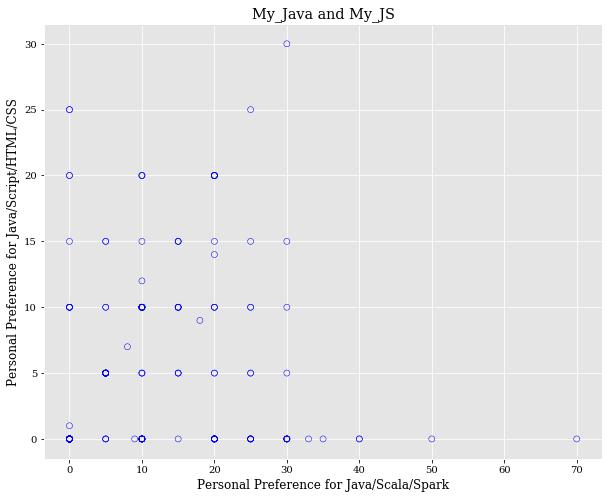

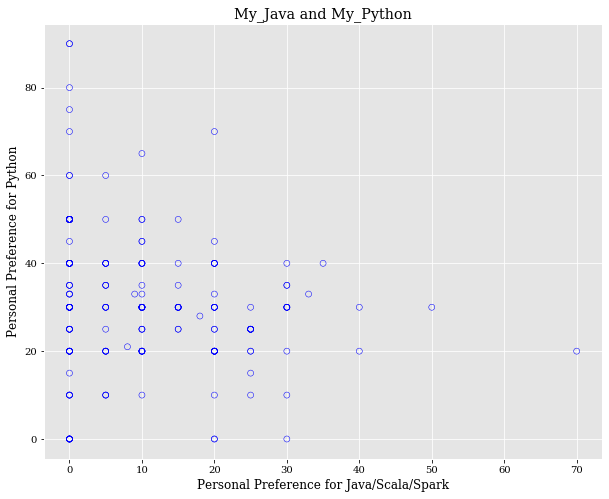

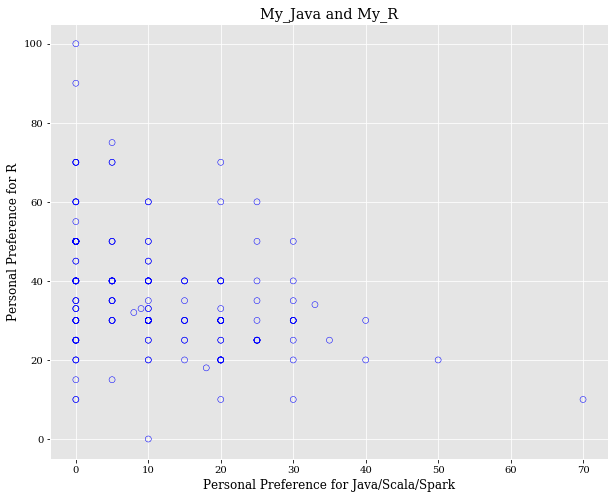

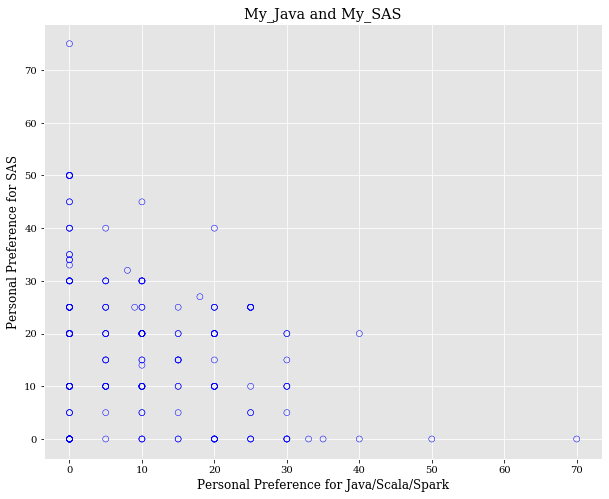

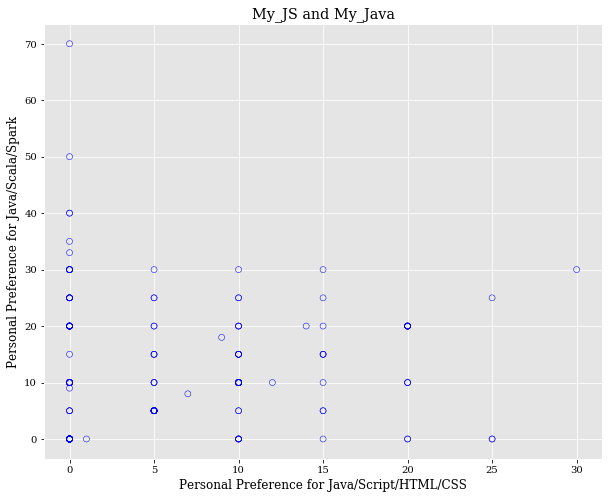

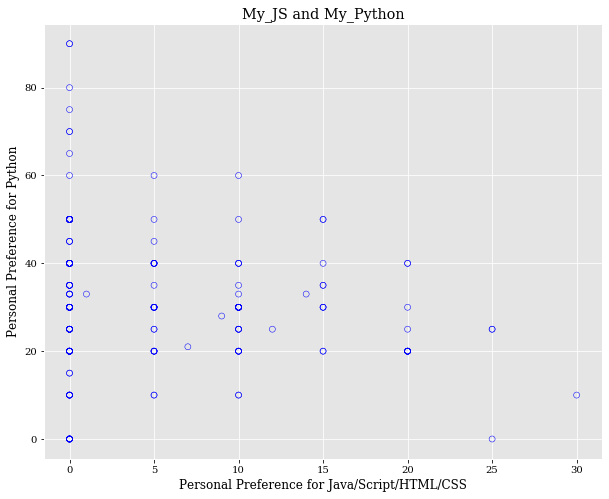

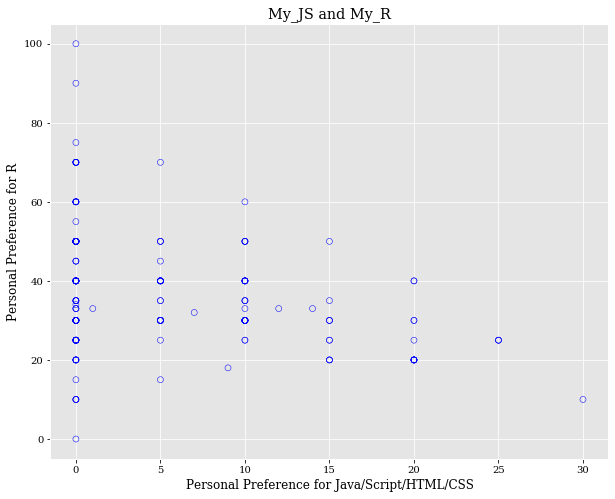

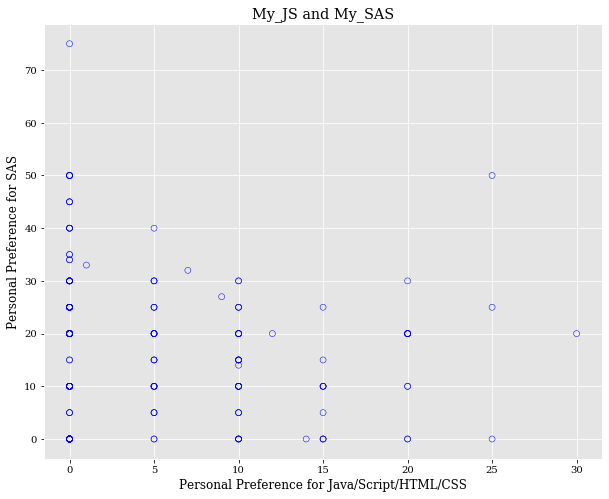

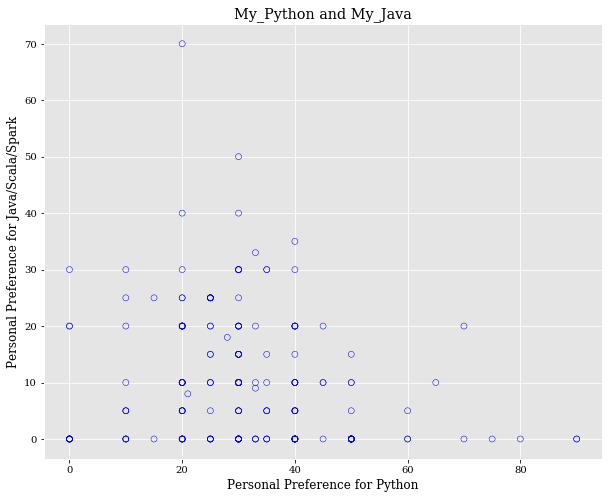

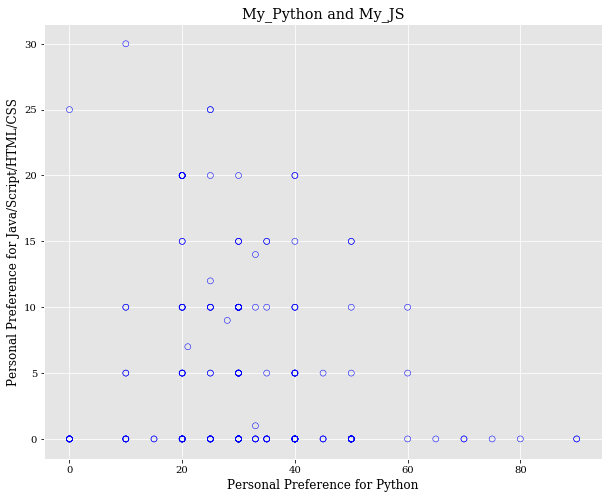

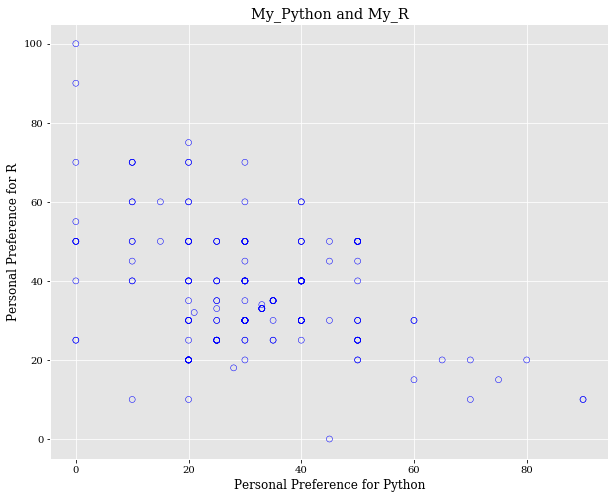

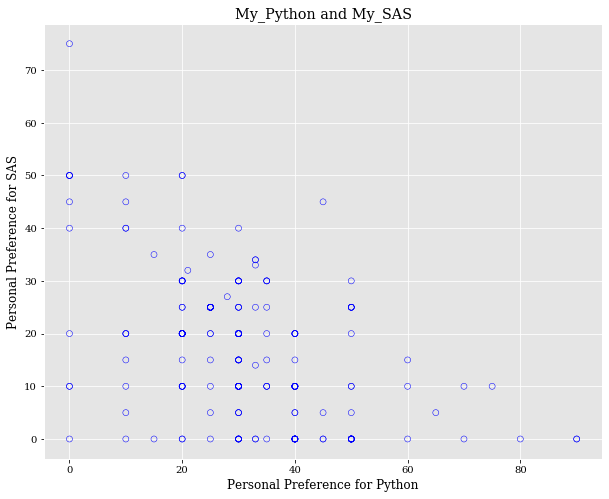

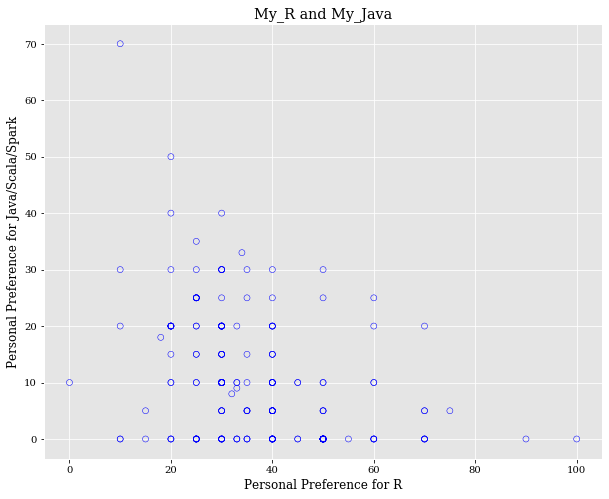

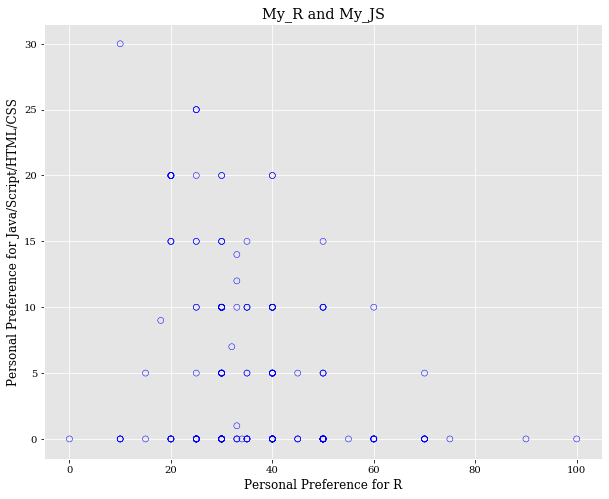

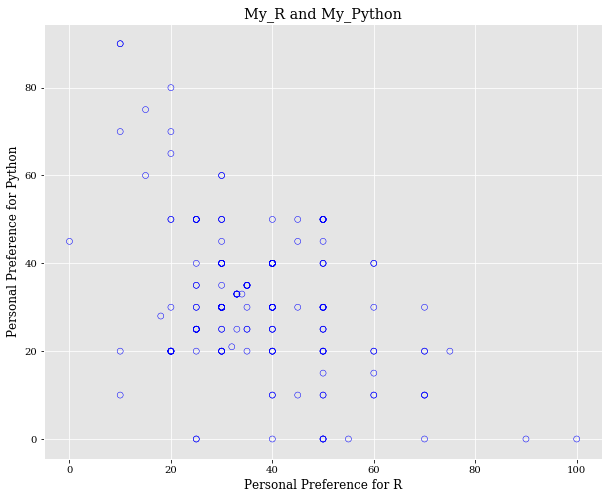

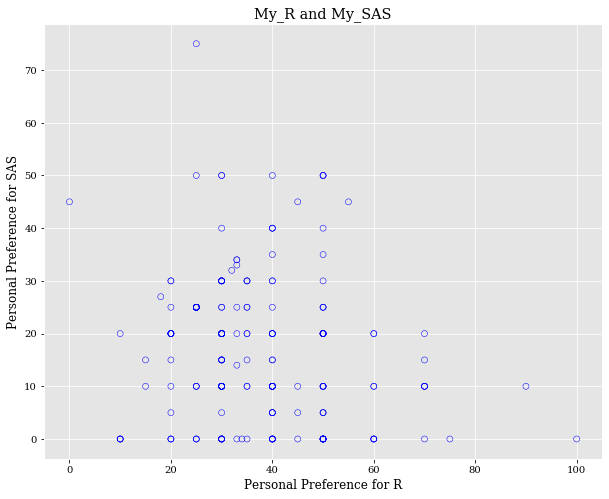

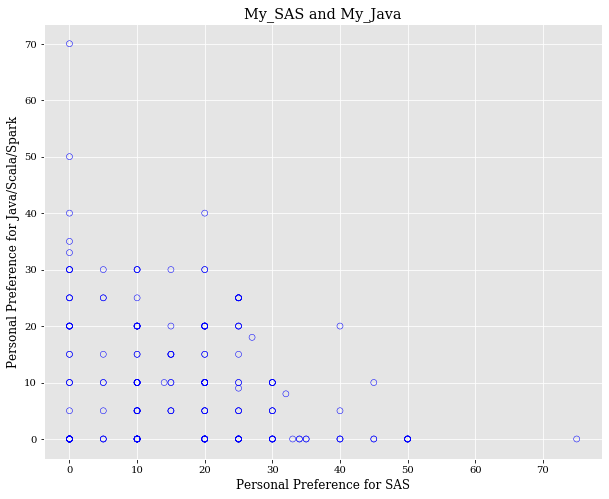

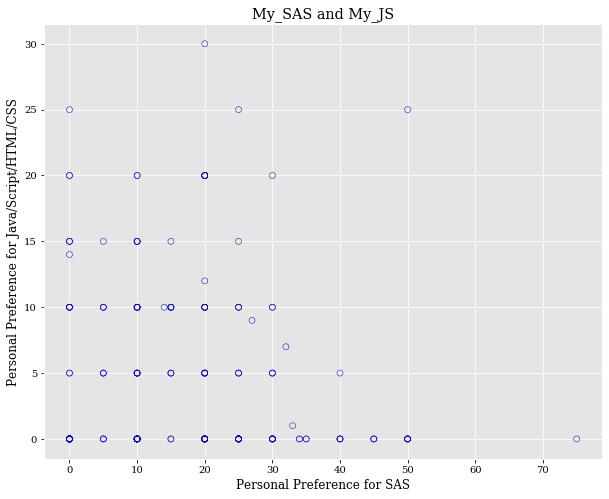

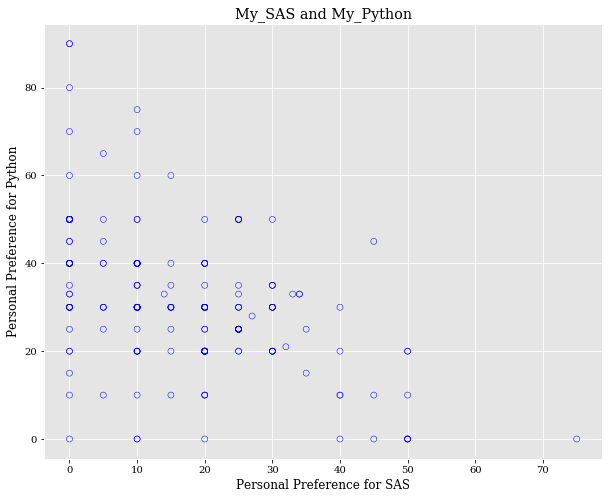

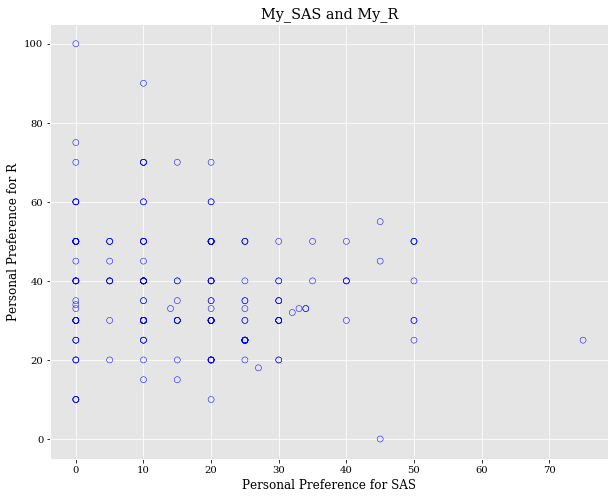

In [26]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.show()
            plt.close()

<Figure size 720x576 with 0 Axes>

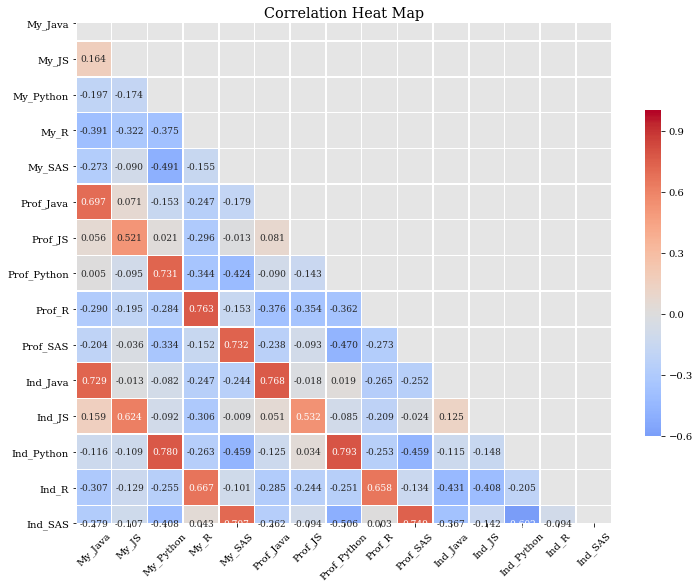


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [27]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

In [28]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

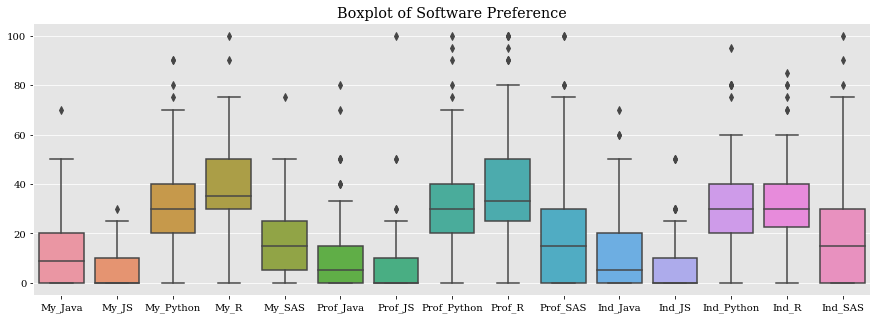

In [29]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_df)
plt.title("Boxplot of Software Preference")
plt.show()
plt.close()

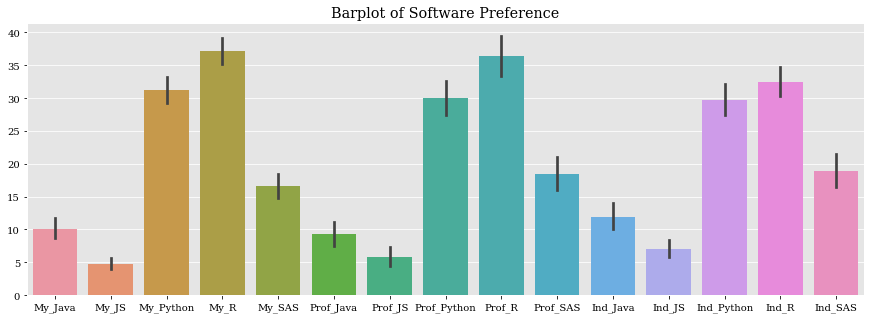

In [30]:
plt.figure(figsize = (15,5))
sns.barplot(data=software_df)
plt.title("Barplot of Software Preference")
plt.show()
plt.close()

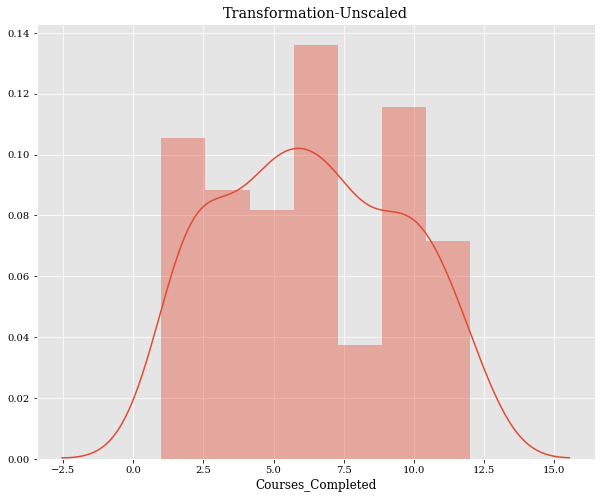

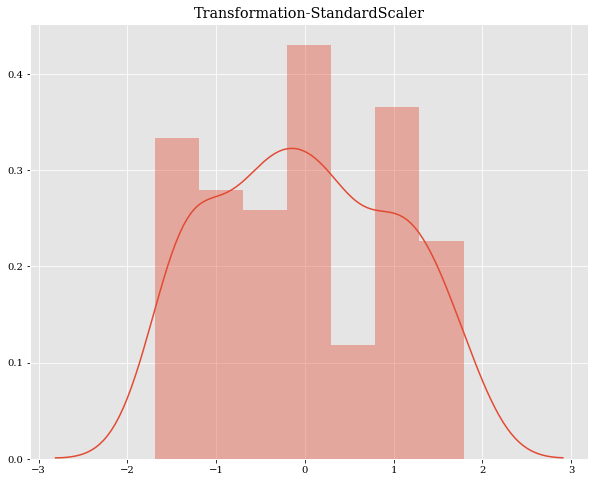

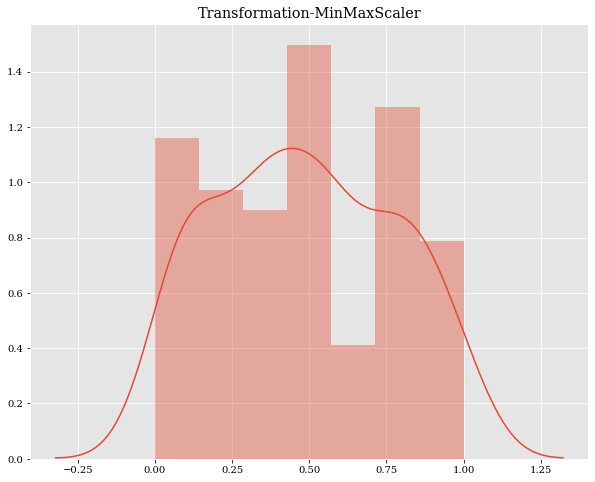

In [31]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes

X = survey_df['Courses_Completed'].dropna()

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
plt.title("Transformation-Unscaled")

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1, 1))).set_title('StandardScaler')
plt.title("Transformation-StandardScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MinMaxScaler')
plt.title("Transformation-MinMaxScaler")

plt.show()
plt.close()

<Figure size 720x576 with 0 Axes>

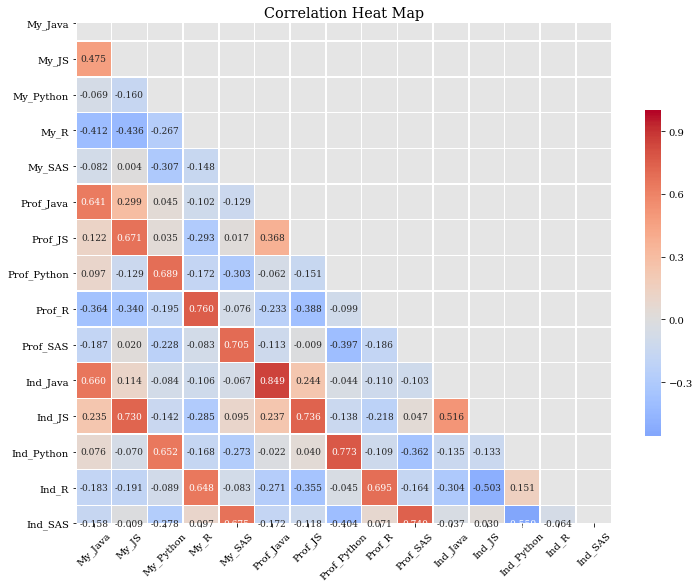

In [32]:
#logged version of correlation heat map
software_df_log = np.log(software_df)
corr_chart(df_corr = software_df_log) 
plt.show()
plt.close()


Skewness of Courses_Completed ---------------
My_Java        1.414207
My_JS          1.370855
My_Python      0.645362
My_R           0.889625
My_SAS         0.856755
Prof_Java      2.134142
Prof_JS        4.237617
Prof_Python    0.618311
Prof_R         0.812853
Prof_SAS       1.393209
Ind_Java       1.412605
Ind_JS         1.754266
Ind_Python     0.595932
Ind_R          0.338222
Ind_SAS        1.322292
dtype: float64

Kurtosis of Courses_Completed ---------------
My_Java         3.212303
My_JS           1.145935
My_Python       1.831434
My_R            1.848680
My_SAS          1.081327
Prof_Java       6.192692
Prof_JS        29.216056
Prof_Python     0.960039
Prof_R          1.219957
Prof_SAS        2.945046
Ind_Java        1.723799
Ind_JS          3.581796
Ind_Python      0.991027
Ind_R           0.708630
Ind_SAS         2.046902
dtype: float64


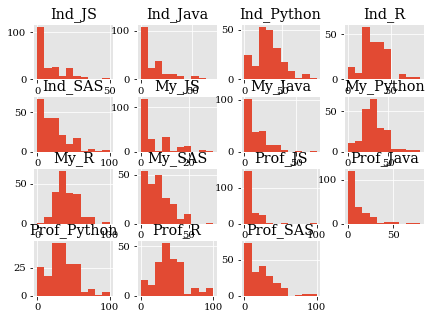

In [33]:
# Check the skewness/kurtosis of Courses_Completed 
print('\nSkewness of Courses_Completed ---------------')
print(software_df.skew())

print('\nKurtosis of Courses_Completed ---------------')
print(software_df.kurtosis())

# Check distribution of  Courses_Completed  by histogram
software_df.hist(figsize=(7,5))
plt.title('Courses_Completed')
plt.show()
plt.close()

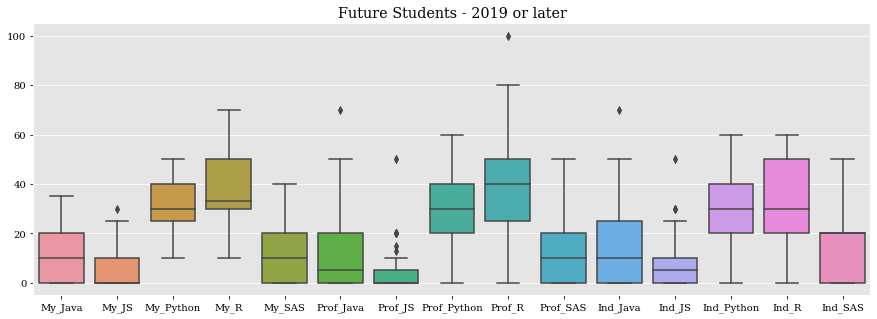

In [34]:
future = ['Winter 2019','Spring 2019','Summer 2019','Fall 2019', '2020 or Later']
future_students = survey_df[survey_df.Graduate_Date.isin(future)  ]

software_future = future_students.loc[:,'My_Java':'Ind_SAS']

#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_future)
plt.title("Future Students - 2019 or later")
plt.show()
plt.close()

In [35]:
grad_date = future_students.loc[:,"Graduate_Date"]
print(grad_date.value_counts())
print(sum(grad_date.value_counts()))

Winter 2019      11
Spring 2019       9
2020 or Later     5
Fall 2019         5
Summer 2019       3
Name: Graduate_Date, dtype: int64
33


In [36]:

ind_python_preferencel_f = software_future['Ind_Python'].sum()
ind_r_preferencel_f = software_future['Ind_R'].sum()
ind_sas_preferencel_f = software_future['Ind_SAS'].sum()

ind_software_pereference_total_f = ind_python_preferencel_f + ind_r_preferencel_f + ind_sas_preferencel_f  

ind_python_preferencel_f_perc = 100*ind_python_preferencel_f / ind_software_pereference_total_f
ind_r_preferencel_f_perc = 100*ind_r_preferencel_f / ind_software_pereference_total_f
ind_sas_preferencel_f_perc = 100*ind_sas_preferencel_f / ind_software_pereference_total_f

print("\nPython Industry Preference Percent --------\n{:.{prec}f} %".format(ind_python_preferencel_f_perc, prec=2))
print("\nR Industry Preference Percent -------------\n{:.{prec}f} %".format(ind_r_preferencel_f_perc, prec=2))
print("\nSAS Industry Preference Percent -----------\n{:.{prec}f} %".format(ind_sas_preferencel_f_perc, prec=2))


Python Industry Preference Percent --------
37.61 %

R Industry Preference Percent -------------
41.77 %

SAS Industry Preference Percent -----------
20.61 %


#### REPORT/FINDINGS:

(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.